In [96]:
#Anomaly detection using autoencoders
#firstly on ecg dataset
#import libararies


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers

In [97]:
#load data
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
dataframe.head()
dataframe=dataframe.values


In [98]:
#preprocessing dataa
#1 for good ecg
labels=dataframe[:,-1]
#all columns except last one
data=dataframe[:,0:-1]

train_Data,test_Data,train_Labels,test_Labels=train_test_split(data,labels,test_size=0.2,random_state=21)
#normalization
trainminval=np.min(train_Data)
trainmaxval=np.max(train_Data)
train_Data=(train_Data-trainminval)/(trainmaxval-trainminval)

testminval=np.min(test_Data)
testmaxval=np.max(test_Data)
test_Data=(test_Data-trainminval)/(trainmaxval-trainminval)

train_Data=train_Data.astype("float32")
test_Data=test_Data.astype("float32")

#split the traindata and testdata to normal and anomalous

train_Labels=train_Labels.astype(bool)
test_Labels=test_Labels.astype(bool)

#we have boolean indexing here with trainlabels 
normal_Train_Data=train_Data[train_Labels]
anomalous_Train_Data=train_Data[~train_Labels]


normal_Test_Data=test_Data[test_Labels]
anomalous_test_Data=test_Data[~test_Labels]


print(normal_Test_Data)
print(anomalous_test_Data)




[[0.48035768 0.28877792 0.19828546 ... 0.45463306 0.5246125  0.3713729 ]
 [0.45354807 0.2557325  0.15979648 ... 0.4801337  0.5284734  0.49527124]
 [0.4521779  0.25685105 0.12592098 ... 0.55448556 0.5861353  0.4754273 ]
 ...
 [0.48304972 0.36122933 0.27729514 ... 0.32799056 0.3158066  0.26930442]
 [0.4090865  0.27907097 0.22604261 ... 0.39099607 0.45987615 0.42140076]
 [0.42648116 0.17669384 0.14546008 ... 0.4733389  0.55036914 0.37805188]]
[[0.3687897  0.30728117 0.26587984 ... 0.58551234 0.5662988  0.5726404 ]
 [0.45878157 0.43861866 0.44218123 ... 0.29617104 0.32473418 0.43136704]
 [0.344323   0.31411245 0.32462206 ... 0.3313962  0.3809925  0.45533565]
 ...
 [0.3493378  0.28614876 0.29047537 ... 0.31901175 0.34637472 0.45208865]
 [0.5713978  0.5637761  0.5245046  ... 0.12886006 0.18022895 0.26692218]
 [0.4697181  0.4619233  0.461555   ... 0.5800685  0.5970339  0.60342324]]


Theory: Auto encoder basically has a encoder and a decoder.The encoder creates a latent representation and the decoder decodes it and we plot the loss.The loss has an average value

The auto encoder trains over non anomalous training set only.Then it has an average loss of the good set loss.

Then when we use this over anomalous dataset, the encoder decoder doesnt work well and loss is huge

Thus an autoencoder is meant to overfit the training data and work badly for any other random input data



In [99]:
#create normal train data and anomalous train data
#done

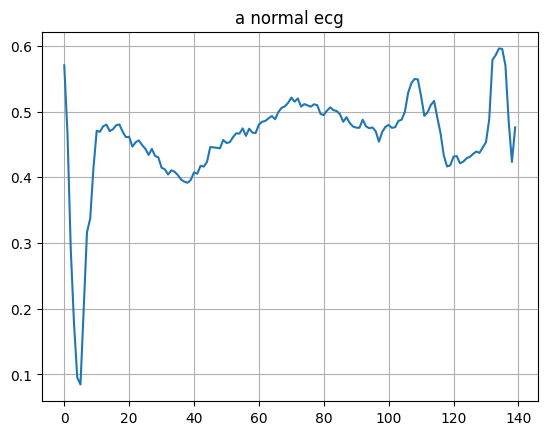

In [100]:
#plot normal and anomalous ecg


plt.grid()
plt.plot(np.arange(0,140),normal_Train_Data[0])
plt.title("a normal ecg")
plt.show()

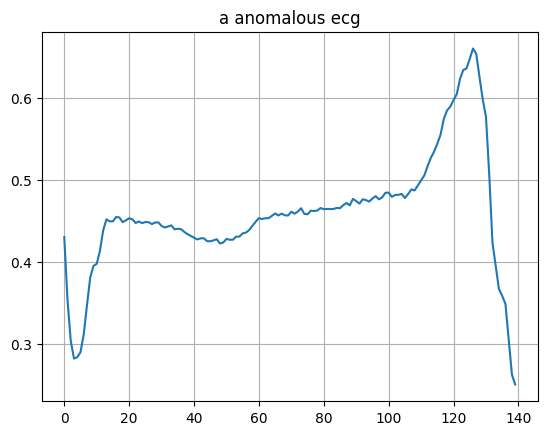

In [101]:
plt.grid()
plt.plot(np.arange(0,140),anomalous_Train_Data[0])
plt.title("a anomalous ecg")
plt.show()

In [102]:

#build the model

class AnomalyDetector(Model):
    def __init__(self):
        super(AnomalyDetector,self).__init__()
        self.encoder=tf.keras.Sequential([
            #input is 140 size ecg data
            layers.Dense(32,activation="relu"),
            layers.Dense(16,activation="relu"),
            layers.Dense(8,activation="relu")
        ])

        self.decoder=tf.keras.Sequential([
            layers.Dense(16,activation="relu"),
            layers.Dense(32,activation="relu"),
            #output 140 size array for the ecg data
            layers.Dense(140,activation="sigmoid")

        ])




    def call(self,x):
        encoded=self.encoder(x)
        decoded=self.decoder(encoded)
        return decoded
    
autoencoder=AnomalyDetector()


In [103]:
#compile the model

autoencoder.compile(optimizer="adam",loss="mae")

In [104]:
#train the model over the good train set only and give evaluation set as complete test set
batch_size=512
epochs=20
H=autoencoder.fit(normal_Train_Data,normal_Train_Data,validation_data=(test_Data,test_Data),batch_size=batch_size,epochs=epochs,shuffle=True)

Epoch 1/20
5/5 [==============================] - 5s 139ms/step - loss: 0.0579 - val_loss: 0.0532
Epoch 2/20
5/5 [==============================] - 0s 35ms/step - loss: 0.0561 - val_loss: 0.0516
Epoch 3/20
5/5 [==============================] - 0s 30ms/step - loss: 0.0535 - val_loss: 0.0500
Epoch 4/20
5/5 [==============================] - 0s 29ms/step - loss: 0.0503 - val_loss: 0.0484
Epoch 5/20
5/5 [==============================] - 0s 33ms/step - loss: 0.0467 - val_loss: 0.0465
Epoch 6/20
5/5 [==============================] - 0s 33ms/step - loss: 0.0428 - val_loss: 0.0445
Epoch 7/20
5/5 [==============================] - 0s 38ms/step - loss: 0.0389 - val_loss: 0.0427
Epoch 8/20
5/5 [==============================] - 0s 36ms/step - loss: 0.0352 - val_loss: 0.0412
Epoch 9/20
5/5 [==============================] - 0s 31ms/step - loss: 0.0322 - val_loss: 0.0396
Epoch 10/20
5/5 [==============================] - 0s 32ms/step - loss: 0.0297 - val_loss: 0.0383
Epoch 11/20
5/5 [===========

18/18 [==============================] - 0s 5ms/step


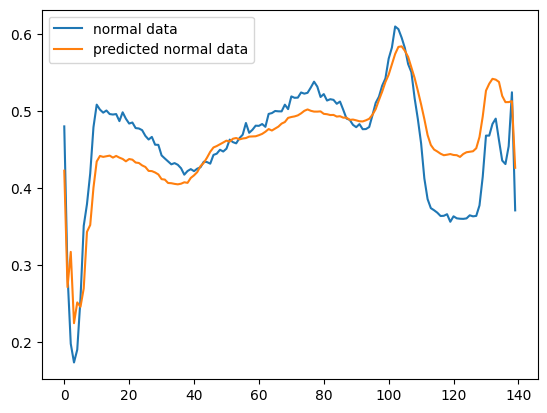

In [105]:
#plot encoded set input decoded set and error from good train set
normalpred=autoencoder.predict(normal_Test_Data)
plt.figure()
plt.plot(normal_Test_Data[0],label="normal data")
plt.plot(normalpred[0],label="predicted normal data")
plt.legend()

52/52 [==============================] - 0s 6ms/step


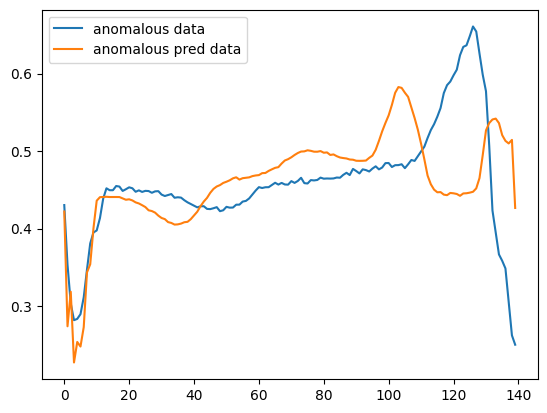

In [106]:
#plot input anomalous test set data and decoded anomalous test data and error from anomalous set

anopred=autoencoder.predict(anomalous_Train_Data)
plt.figure()
plt.plot(anomalous_Train_Data[0],label="anomalous data")
plt.plot(anopred[0],label="anomalous pred data")
plt.legend()


74/74 [==============================] - 0s 4ms/step


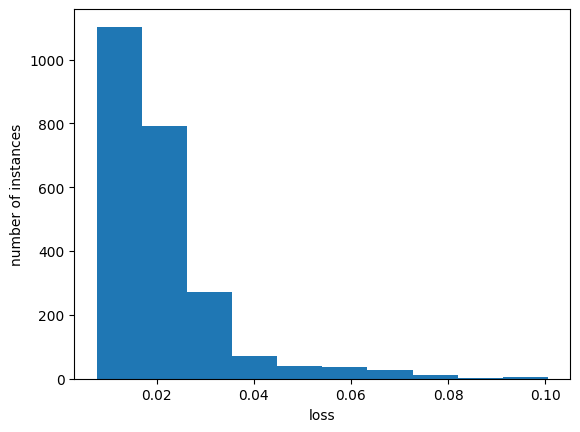

In [107]:
#plot histogram of loss of autoencoder predict on normal test data
normalpred=autoencoder.predict(normal_Train_Data)
normalloss=tf.keras.losses.mae(normal_Train_Data,normalpred)
plt.hist(normalloss[None,:])
plt.xlabel("loss")
plt.ylabel("number of instances")
plt.show()


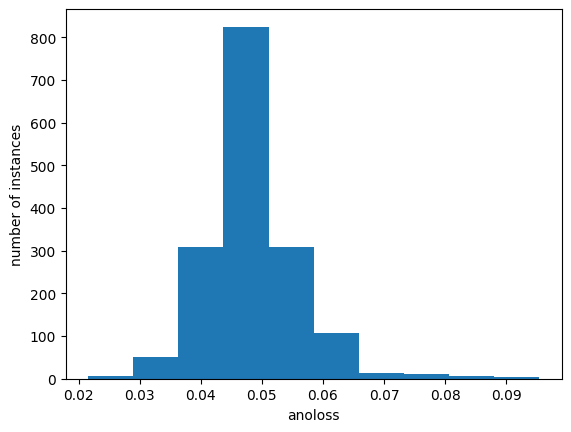

In [108]:
#plot histogram of loss of autoencoder predict on anomalous test data
anoloss=tf.keras.losses.mae(anomalous_Train_Data,anopred)
plt.hist(anoloss[None,:])
plt.xlabel("anoloss")
plt.ylabel("number of instances")
plt.show()

In [113]:
#select threshold

threshold=np.mean(normalloss)+np.std(normalloss)
print(threshold)

0.033099387


In [114]:
#create a predict function that is the main anomaly detector
#it takes the model,the data and threshold as input
#it uses the model to generate reconstructions
#it computes the loss vector
#it returns the reconstructions with loss less than the threshold


def predicts(model,data,threshold):
    reconstructions=model(data)
    losscalculated=tf.keras.losses.mae(reconstructions,data)
    return tf.math.less(losscalculated,threshold)
#returns a boolean tensor as 1 if loss is less than threshold




In [115]:
#get predicted data using the predict function
#evaluate using classification report

#complete test set
preds=predicts(autoencoder,test_Data,threshold)
print(classification_report(test_Labels,preds))
from sklearn.metrics import accuracy_score, precision_score, recall_score

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))


print_stats(preds, test_Labels)

              precision    recall  f1-score   support

       False       0.90      0.99      0.94       440
        True       0.99      0.91      0.95       560

    accuracy                           0.94      1000
   macro avg       0.94      0.95      0.94      1000
weighted avg       0.95      0.94      0.95      1000

Accuracy = 0.945
Precision = 0.9922027290448343
Recall = 0.9089285714285714


In [116]:
print(test_Labels.shape)
print(preds.shape)

(1000,)
(1000,)
